In [79]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import bisect
%config InlineBackend.figure_format = 'retina'

# Q1 chart

In [5]:
data = dict(
    segment=['Segment 1','Segment 2','Segment 3','Segment 4','Segment 5','Segment 6','Segment 7'],
    us=[16,7,10,10,10,32,15],
    our=[9,10,15,18,17,20,11])

customer = pd.DataFrame(data)
customer = customer[['us','our']].T
customer.columns = data['segment']


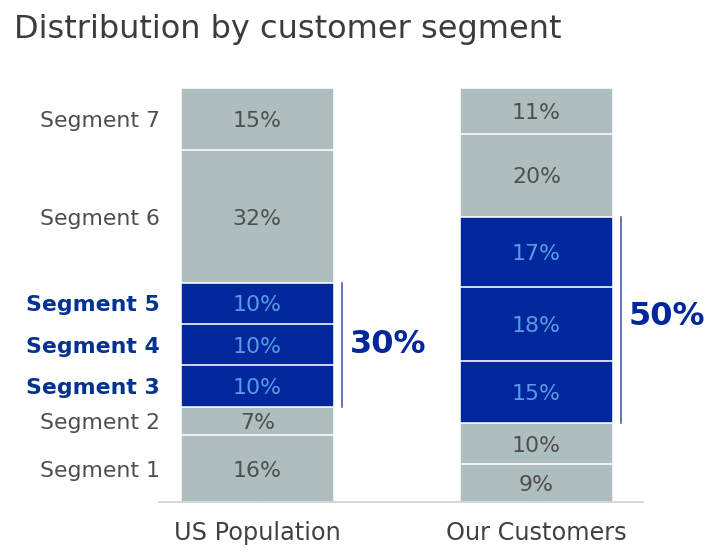

In [76]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

for i, columns in enumerate(reversed(customer.columns)):
    bar_color = ('#00279B' if i in [2,3,4] else '#AEBDBE')
    bar_height = customer.loc[:, :columns].sum(axis=1)
    label_height = bar_height - customer.loc[:, columns] / 2 - 1.8
    label_color = ('#5B9AE5' if i in [2,3,4] else '#4E4E4E')
    label_weight = ('bold' if i in [2,3,4] else 'regular')
    axis_color = ('#033290' if i in [2,3,4] else '#4E4E4E')
    
    # draw segments
    ax.bar(customer.index, bar_height
          ,color=bar_color, edgecolor='white', linewidth=0.8
          ,width=0.55)
    
    # label segments
    for i, height in enumerate(label_height):
        ax.text(i, height, str(customer.loc[:, columns][i]) + '%' , 
                ha='center', color=label_color, 
                fontdict=dict(fontsize=11
               ,weight='light'))
    
    # label axis        
    ax.text(-0.35, label_height[0], columns, 
        ha='right', color=axis_color, 
        fontdict=dict(fontsize=11
        ,weight=label_weight))
    
# axis configurations
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#CDD0CE')
ax.get_yaxis().set_visible(False)
ax.tick_params(length=6, color='white')

# set x-tick labels
ax.set_xticks([0,1])
ax.set_xticklabels(['US Population','Our Customers']
                   ,fontsize=12
                  ,color='#414141', fontweight='medium')

# draw annotations

ax.plot([0.55/2*1.1,0.55/2 *1.1], [23,53], c='#415BA3', lw=.8)
ax.plot([0.55/2*1.1+1,0.55/2 *1.1+1], [19,69], c='#415BA3', lw=.8)
ax.text(0.55/2*1.2, 36, '30%', ha='left', 
        color='#00279B', fontsize=16, fontweight='bold')
ax.text(0.55/2*1.2+1, 43, '50%', ha='left', 
        color='#00279B', fontsize=16, fontweight='bold')

# add title
ax.set_title('Distribution by customer segment' +' '*8
             ,loc='right' ,pad=15
            ,fontsize=16 ,color='#3C3C3C', fontweight='roman')

plt.tight_layout()
plt.show()

# Q3

In [120]:
death = pd.read_csv('brazil_excess_deaths.csv')[['country','region','month','excess_deaths_pct_change']]

# sort dataframe by region in order presented on chart
region_order = np.array(['São Paulo','Rio de Janeiro', 'Manaus', 'Recife',  'Fortaleza',])
death.region = pd.Categorical(death.region, region_order)
death = death.sort_values('region')


In [121]:
# define color assignment function
def color_assigment(value):
    i = bisect.bisect([0, 0.25, 0.5, 1, 2], value)
    color = {0: '#E8F0F4',
             1: '#FFEDD4',
             2: '#FFC57E',
             3: '#FF804C',
             4: '#E93C28',
             5: '#B10000'}

    return color[i]

# add column mapping excess pct change to hex color
death['color_hex'] = death['excess_deaths_pct_change'].apply(color_assigment)
death[death.month ==7]

,country,region,month,excess_deaths_pct_change,color_hex
34,Brazil,São Paulo,7,0.369215,#FFC57E
27,Brazil,Rio de Janeiro,7,-0.023321,#E8F0F4
13,Brazil,Manaus,7,0.063158,#FFEDD4
6,Brazil,Recife,7,0.523522,#FF804C
20,Brazil,Fortaleza,7,0.499261,#FFC57E


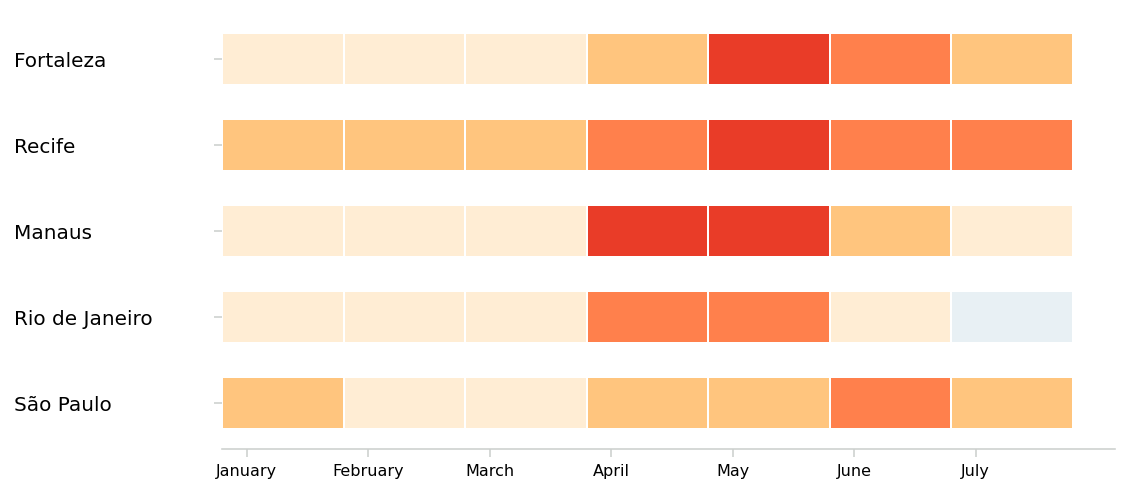

In [159]:

fig,ax = plt.subplots(1,1, figsize=(8,4)) 

regions = death.region.unique()
num_regions = len(regions)
ones = np.ones(num_regions)

for month in range(7,0, -1):
    ax.barh(regions, month * ones
            ,height=0.6
            ,color=death[death.month == month]['color_hex'], 
            align='center',
            edgecolor='white')


# hide spines   
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#CDD0CE')
ax.tick_params(length=4, color='#CDD0CE')

# configure y-axis alignment
ax.set_yticks(np.linspace(0,4,5))
ax.set_yticklabels(regions, ha='left')
ax.get_yaxis().set_tick_params(pad=100)

# configure x-axis alignment
ax.set_xticks(np.linspace(0.2, 6.2, 7))
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July']
                   ,fontsize=8
                  ,ha='center')


plt.show()